In [1]:
# General Imports
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from mpl_toolkits.mplot3d import Axes3D

# General sklearn imports
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, classification_report

# Sklearn imports for Models
from sklearn.svm import SVC, OneClassSVM
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, GradientBoostingClassifier, RandomForestRegressor

# ADVICE
# Use AWS & sagemaker till Rice platform !!
# Change to classification task !!!
# Down sample: randomly sample 0 to make equal size for both classes !!!
# Increase class 1 information **
# Impute might affect data. Check if distribution has not changed for the other features. !!
# Find features with difference e.g. t-test (normal), non-parametric (Mann-Whitney, Wilcoxon?) 

# Data Preprocessing

1. The given features are identical to a variable not given below.
    
    f34, f35, f37, f38, f58, f86, f87, f88, f96, f97, f98, f106, f107, f108, f116, f117, f118, f126, f127, f128, f155, f156, f157, f165, f166, f167, f175, f176, f177, f185, f186, f187, f195, f196, f197, f225, f226, f227, f235, f236, f237, f245, f246, f247, f255, f256, f257, f265, f266, f267, f294, f295, f296, f302, f303, f304, f310, f311, f312, f318, f319, f320, f326, f327, f328, f345, f354, f362, f371, f379, f408, f417, f427, f457, f478, f488, f498, f508, f553, f563, f573, f582, f599, f700, f701, f702, f729, f741, f764
    
    Add f678 if imputed before dropping
    
   

In [102]:
duplicate_columns = ['f34', 'f35', 'f37', 'f38', 'f58', 'f86', 'f87', 'f88', 'f96', 'f97', 
                     'f98', 'f106', 'f107', 'f108', 'f116', 'f117', 'f118', 'f126', 'f127',
                     'f128', 'f155', 'f156', 'f157', 'f165', 'f166', 'f167', 'f175', 'f176',
                     'f177', 'f185', 'f186', 'f187', 'f195', 'f196', 'f197', 'f225', 'f226',
                     'f227', 'f235', 'f236', 'f237', 'f245', 'f246', 'f247', 'f255', 'f256',
                     'f257', 'f265', 'f266', 'f267', 'f294', 'f295', 'f296', 'f302', 'f303',
                     'f304', 'f310', 'f311', 'f312', 'f318', 'f319', 'f320', 'f326', 'f327',
                     'f328', 'f345', 'f354', 'f362', 'f371', 'f379', 'f408', 'f417', 'f427',
                     'f457', 'f478', 'f488', 'f498', 'f508', 'f553', 'f563', 'f573', 'f582',
                     'f599', 'f700', 'f701', 'f702', 'f729', 'f741', 'f764']

drop_high_correlation = ['f9', 'f10', 'f15', 'f17', 'f22', 'f24', 'f28', 'f30', 'f40', 'f42', 
                       'f46', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f56', 'f59', 'f60', 
                       'f61', 'f62', 'f64', 'f74', 'f78', 'f79', 'f91', 'f95', 'f101', 'f105', 
                       'f111', 'f115', 'f121', 'f124', 'f125', 'f137', 'f138', 'f139', 'f141', 
                       'f146', 'f147', 'f154', 'f164', 'f174', 'f184', 'f194', 'f206', 'f207', 
                       'f214', 'f215', 'f216', 'f230', 'f234', 'f240', 'f244', 'f250', 'f254', 
                       'f260', 'f263', 'f264', 'f276', 'f277', 'f280', 'f284', 'f287', 'f325', 
                       'f335', 'f336', 'f337', 'f338', 'f339', 'f343', 'f347', 'f352', 'f355', 
                       'f356', 'f360', 'f363', 'f364', 'f365', 'f368', 'f369', 'f370', 'f372', 
                       'f373', 'f377', 'f381', 'f382', 'f386', 'f387', 'f388', 'f389', 'f391', 
                       'f396', 'f397', 'f400', 'f401', 'f407', 'f409', 'f410', 'f411', 'f414', 
                       'f415', 'f418', 'f419', 'f420', 'f421', 'f423', 'f424', 'f426', 'f430', 
                       'f434', 'f435', 'f437', 'f438', 'f439', 'f440', 'f443', 'f445', 'f446', 
                       'f447', 'f449', 'f452', 'f453', 'f454', 'f455', 'f459', 'f460', 'f461', 
                       'f464', 'f465', 'f467', 'f469', 'f470', 'f472', 'f475', 'f476', 'f477', 
                       'f480', 'f481', 'f482', 'f483', 'f484', 'f485', 'f486', 'f487', 'f490', 
                       'f491', 'f492', 'f493', 'f494', 'f495', 'f496', 'f497', 'f500', 'f501', 
                       'f502', 'f503', 'f504', 'f505', 'f506', 'f507', 'f510', 'f511', 'f512', 
                       'f513', 'f517', 'f519', 'f520', 'f521', 'f523', 'f527', 'f528', 'f529', 
                       'f532', 'f535', 'f537', 'f538', 'f539', 'f540', 'f542', 'f543', 'f544', 
                       'f545', 'f547', 'f548', 'f549', 'f550', 'f551', 'f552', 'f554', 'f555', 
                       'f557', 'f558', 'f559', 'f560', 'f561', 'f562', 'f564', 'f565', 'f567', 
                       'f568', 'f569', 'f570', 'f571', 'f572', 'f574', 'f575', 'f576', 'f577', 
                       'f578', 'f579', 'f580', 'f581', 'f583', 'f584', 'f585', 'f587', 'f591', 
                       'f592', 'f597', 'f598', 'f606', 'f607', 'f608', 'f610', 'f611', 'f622', 
                       'f623', 'f624', 'f625', 'f626', 'f627', 'f628', 'f630', 'f633', 'f635', 
                       'f636', 'f641', 'f642', 'f643', 'f644', 'f645', 'f651', 'f655', 'f659', 
                       'f663', 'f666', 'f667', 'f668', 'f671', 'f675', 'f676', 'f681', 'f683', 
                       'f684', 'f685', 'f686', 'f687', 'f688', 'f689', 'f690', 'f691', 'f692', 
                       'f693', 'f694', 'f695', 'f697', 'f698', 'f699', 'f703', 'f704', 'f705', 
                       'f706', 'f707', 'f708', 'f709', 'f710', 'f711', 'f712', 'f713', 'f714', 
                       'f717', 'f718', 'f719', 'f720', 'f721', 'f722', 'f724', 'f726', 'f727', 
                       'f728', 'f730', 'f731', 'f732', 'f735', 'f738', 'f745', 'f747', 'f748', 
                       'f749', 'f750', 'f752', 'f753', 'f754', 'f755', 'f757', 'f758', 'f759', 
                       'f760', 'f761', 'f762', 'f763', 'f765', 'f766', 'f767', 'f768', 'f770', 
                       'f771', 'f772', 'f773', 'f774', 'f777', 'f18', 'f20', 'f21', 'f23', 
                         'f27', 'f29', 'f31', 'f39', 'f41', 'f45', 'f55', 'f57', 'f63', 'f65', 
                         'f67', 'f68', 'f70', 'f76', 'f83', 'f85', 'f89', 'f93', 'f99', 'f103', 
                         'f113', 'f114', 'f119', 'f120', 'f123', 'f129', 'f130', 'f131', 'f133', 
                         'f134', 'f136', 'f143', 'f152', 'f160', 'f162', 'f170', 'f172', 'f180', 
                         'f182', 'f192', 'f193', 'f198', 'f202', 'f203', 'f205', 'f210', 'f212', 
                         'f220', 'f222', 'f224', 'f228', 'f229', 'f232', 'f238', 'f242', 'f248', 
                         'f252', 'f253', 'f258', 'f259', 'f262', 'f268', 'f269', 'f270', 'f272', 
                         'f273', 'f275', 'f282', 'f285', 'f291', 'f293', 'f297', 'f299', 'f301', 
                         'f305', 'f307', 'f309', 'f313', 'f315', 'f317', 'f322', 'f323', 'f324', 
                         'f333', 'f334', 'f342', 'f346', 'f348', 'f351', 'f353', 'f357', 'f359', 
                         'f361', 'f376', 'f378', 'f380', 'f383', 'f398', 'f399', 'f404', 'f405', 
                         'f406', 'f425', 'f428', 'f429', 'f441', 'f442', 'f456', 'f466', 'f489', 
                         'f515', 'f516', 'f524', 'f530', 'f531', 'f534', 'f541', 'f589', 'f590', 
                         'f593', 'f594', 'f596', 'f601', 'f614', 'f617', 'f619', 'f621', 'f629', 
                         'f632', 'f634', 'f654', 'f656', 'f658', 'f662', 'f664', 'f665', 'f674', 
                         'f682', 'f716', 'f734', 'f737', 'f742', 'f744', 'f751']

skewed = ['f72', 'f132', 'f133', 'f134', 'f136', 'f201', 'f202', 'f203', 'f205', 'f271', 
          'f272', 'f273', 'f275', 'f286', 'f332', 'f333', 'f334', 'f350', 'f358', 'f367', 
          'f375', 'f393', 'f394', 'f429', 'f451', 'f466', 'f471', 'f515', 'f525', 'f534', 
          'f536', 'f586', 'f588', 'f594', 'f595', 'f604', 'f612', 'f615', 'f616', 'f617', 
          'f618', 'f619', 'f634', 'f637', 'f648', 'f649', 'f650', 'f673', 'f723', 'f18', 
          'f20', 'f21', 'f29', 'f31', 'f68', 'f70', 'f76', 'f83', 'f89', 'f93', 'f103', 
          'f113', 'f114', 'f119', 'f123', 'f129', 'f143', 'f152', 'f162', 'f172', 'f182', 
          'f192', 'f205', 'f210', 'f212', 'f222', 'f224', 'f228', 'f232', 'f242', 'f252', 
          'f253', 'f258', 'f259', 'f262', 'f268', 'f275', 'f282', 'f315', 'f317', 'f323', 
          'f348', 'f351', 'f353', 'f357', 'f359', 'f361', 'f376', 'f399', 'f405', 'f428', 
          'f441', 'f466', 'f534', 'f541', 'f593', 'f594', 'f619', 'f621', 'f658', 'f662', 
          'f664', 'f665', 'f716']

log_norm = 1.0000001

def read_data(csv_path):
    """
    Given a path to a file, reads in the data in the file
    """
    print("Reading Data...")
    data = pd.read_csv(csv_path)
    print("Shape:", data.shape)
    return data

def clean_data(data):
    """
    Cleans data by taking string based NAs and converting to NaN.
    Assumes that the string columns are integer columns.
    """
    print("Cleaning Data...")
    data.drop(columns=["id"], inplace=True)
    data = data.replace("NA", None)
    for col_name in data.select_dtypes(exclude=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns:
        data[col_name] = pd.to_numeric(data[col_name], downcast="integer", errors="coerce")
    return data

def drop_duplicate_columns(data):
    """
    Iterates through columns in dataframe to find columns
    with identical values and compiles a single one of these columns into
    a set of columns to be dropped.
    """
    print("Drop Duplicate Columns in Data...")
    col_names = set() 
    for x in range(data.shape[1]):
        if (x%5 == 0):
            print(x, "...")
        col = data.iloc[:, x] 
        for y in range(x + 1, data.shape[1]):
            check_dup = data.iloc[:, y] 
            if col.equals(check_dup): 
                col_names.add(data.columns.values[y]) 
    return data.drop(columns=list(col_names))

def direct_drop(data):
    """
    Iterates through columns in dataframe to find columns
    with identical values and compiles a single one of these columns into
    a set of columns to be dropped.
    """
    print("Directly Dropping Duplicate Columns...")
    dropped_data = data.drop(columns=duplicate_columns)
    dropped_data.drop(columns=drop_high_correlation, inplace=True)
    return dropped_data

def impute_values(data):
    """
    Fits a simple imputer to the dataset and imputes missing
    values in the dataset.
    Might need to be changed to an iterative imputer.
    """
    print("Imputing Missing Data...")
    matrix = data.to_numpy()
    imp = SimpleImputer()
    imp.fit(matrix)
    complete_data = pd.DataFrame(imp.transform(matrix), columns=data.columns)
    return complete_data

def log_skew(data):
    """
    Takes the log of the values of columns with data that is 
    skewed greater than 10 standard deviations
    """
    print("Log Skewed Data...")
    data_copy = data.copy()
    for col in data_copy.columns:
        std = dropped_data[col].std()
        a = np.zeros(length)
        if std != 0:
            a = (dropped_data[col] - dropped_data[col].mean())/std
        skewval = skew(a)
        if abs(skewval) > 10:
            data_copy[col] = np.log(data_copy[col] + log_norm - data_copy[col].min())
    return data_copy

def direct_log_skew(data):
    """
    Takes the log of the values of columns with data that is 
    skewed greater than 10 standard deviations
    """
    print("Directly Log Skewed Data...")
    data_copy = data.copy()
    for col in skewed:
        try:
            data_copy[col] = np.log(data_copy[col] + log_norm - data_copy[col].min())
        except:
            continue
    return data_copy

def reduce_memory_usage(data):
    """
    Iterates over all the columns in data and checks
    the minimum and maximum values to map the data
    to a lower memory type.
    Mutates input.
    """
    print("Reducing Memory Data...")
    count = 0
    for col_name in data.columns:
        if col_name == "loss":
            continue
        if count % 50 == 0:
            print(count)
        count +=1
        col = data[col_name]
        sum_val = col.sum()
        max_val = col.max()
        min_val = col.min()
        int_sum_val = col.astype('int').sum()
        if int_sum_val != sum_val:
            if max_val <= 127 and min_val >= -128: 
                data[col_name] = col.astype("int8")
                continue
            if max_val <= 32767 and min_val >= -32768:
                data[col_name] = col.astype("int16")
                continue
            if max_val <= 2147483647 and min_val >= -2147483648:
                data[col_name] = col.astype("int32")
                continue
            if max_val <= 9223372036854775807 and min_val >= -9223372036854775808:
                data[col_name] = col.astype("int64")
                continue
        else:
            if max_val <= np.finfo(np.float16).max and min_val >= np.finfo(np.float16).min:
                data[col_name] = col.astype("float16")
                continue
            if max_val <= np.finfo(np.float32).max and min_val >= np.finfo(np.float32).min:
                data[col_name] = col.astype("float32")
                continue
            if max_val <= np.finfo(np.float64).max and min_val >= np.finfo(np.float64).min:
                data[col_name] = col.astype("float64")
                continue

In [103]:
data = clean_data(read_data("train_v2.csv"))
complete_loan_data = impute_values(data)
dropped_data = direct_drop(complete_loan_data)
final_data = direct_log_skew(dropped_data)
print(final_data.shape)

Reading Data...


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (135,204,274,417) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Shape: (105471, 771)
Cleaning Data...
Imputing Missing Data...
Directly Dropping Duplicate Columns...
Directly Log Skewed Data...
(105471, 210)


# Data Exploration

1. The target variable is imbalanced. See Graph 1.


2. The following features are perfectly correlated by Pearson correlation.

    f74  - f722; f676 - f765
    
    
3. There is no one feature that has a high correlation with the target variable under Pearson's correlation. The feature with the highest correlation has a score of 0.03985.


4. Under Spearman's correlation, the highest correlation with the target variable is ~0.11.
    
    
5. Some features are perfectly correlated under Pearson. See heatmap at Graph 2. Spearman is still being explored.

    
6. The features are not linearly separable as can be seen in Graphs 3 & 4. The yellow and light blue signify the positive class. One future exploration would be to consider breaking the classes at 0.5 instead of 0.

7. Tranform skewed features using log to make them more gaussian. !!!

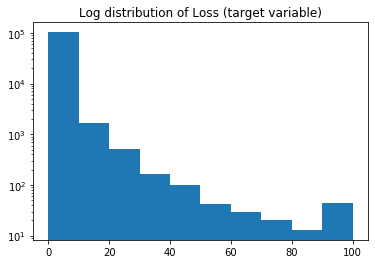

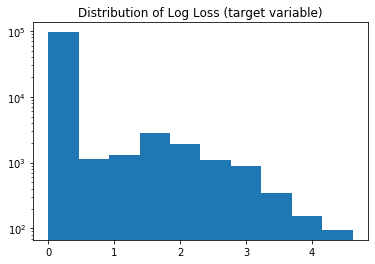

In [104]:
# Plot the target variable

plt.hist(final_data["loss"])
plt.yscale('log')
plt.title('Log distribution of Loss (target variable)')
plt.show()

log_target = np.log(final_data["loss"] + log_norm)
log_target.loc[log_target == -float("inf")] = -1
plt.hist(log_target)
plt.yscale('log')
plt.title('Distribution of Log Loss (target variable)')
plt.show()

In [105]:
def highly_correlated_features(df, target_col, method="pearson", threshold=0.5):
    """
    Given the correlation technique, dataset and target column, 
    it gives the dataframe of the correlation.
    It also prints out the highest correlation coefficient for each feature and
    especially the target variable.
    """
    
    #Using Pearson Correlation
    cor = df.corr(method=method)
    cor_target = abs(cor[target_col])
    print("Highest correlation of any feature to target:", cor_target[:-1].max())
    
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>=0.05]
    print("All features with correlation greater than 0.5 to target:", relevant_features)
    
    #Correlation with output variable
    for i in cor.columns:
        cor_target = abs(cor[i])
        #Selecting highly correlated features
        relevant_features = cor_target[cor_target>=1.0]
        if (len(relevant_features) > 1):
            print("Following features relate highly to", i)
            print(relevant_features)
    return cor
    

In [6]:
cor_spearman = highly_correlated_features(final_data, "loss", method="spearman", threshold=0.1)

Highest correlation of any feature to target: 0.12829924459676534
All features with correlation greater than 0.5 to target: f13     0.084276
f14     0.091131
f16     0.050163
f18     0.086409
f19     0.088744
          ...   
f632    0.052163
f634    0.064215
f648    0.055702
f677    0.086452
loss    1.000000
Name: loss, Length: 175, dtype: float64


In [7]:
cor_kendall = highly_correlated_features(final_data, "loss", method="kendall", threshold=0.09)

Highest correlation of any feature to target: 0.10223065476106047
All features with correlation greater than 0.5 to target: f13     0.069780
f14     0.072975
f18     0.069229
f19     0.070726
f20     0.071986
          ...   
f629    0.095667
f631    0.070023
f634    0.051207
f677    0.071570
loss    1.000000
Name: loss, Length: 134, dtype: float64


In [11]:
cor_pearson = highly_correlated_features(final_data, "loss", threshold=0.03)

Highest correlation of any feature to target: 0.046887171687045474
All features with correlation greater than 0.5 to target: loss    1.0
Name: loss, dtype: float64


In [106]:
def drop_high_correlations(corr):
    upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.95)]
    
    print(to_drop)
    return to_drop

In [107]:
high_correlation = drop_high_correlations(cor_pearson)

[]


In [108]:
def heatmap_of_correlation(corr, threshold):
    """
    Creates heatmap of features that have a correlation above
    a given threshold.
    """
    
    # Take absolute value of correlation matrix
    cor = corr.abs()
    
    # Reduce to features that have a correlation above threshold
    for i in cor.columns:
        cor[i][i] = -1.0
    highly_related = cor[cor.columns[(cor > threshold).any()]]
    indices = []
    for j in highly_related.index:
        if j not in highly_related.columns:
            indices.append(j)
    highly_related.drop(index=indices, inplace=True)
    for i in highly_related.columns:
        highly_related[i][i] = 1.0
        
    # Create a heatmap
    mask = np.zeros_like(highly_related)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10,6))
    chart = sns.heatmap(highly_related, center=0, cmap='YlGnBu', mask = mask, annot=True, fmt='.2g')
    ax.set_title('Collinearity of Highly Correlated Features')
    

In [109]:
heatmap_of_correlation(cor_pearson, 0.5)

In [13]:
def pca_computation(df, target_col):
    """
    Given dataset and target variable, plots 2d and 3d graphs for
    the first 2 or 3 reduced features respectively.
    The lighter colors correspond to the positive points.
    """
    
    # Normalize features
    features_df = df.drop(columns=[target_col])
    scaled_data = StandardScaler().fit_transform(features_df)
    
    # Get reduced features
    pca_res = pd.DataFrame()
    pca = PCA(n_components=100)
    pca_result = pca.fit_transform(scaled_data)
    pca_res['pca-one'] = pca_result[:,0]
    pca_res['pca-two'] = pca_result[:,1] 
    pca_res['pca-three'] = pca_result[:,2]
    pca_res["y"] = np.clip(df[target_col], 0, 1)
    print("Explained variation per principal component:", pca.explained_variance_ratio_.sum(), pca.n_components)

    # Plot 2-d graphs of 1st and 2nd components
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    ax.scatter(pca_res['pca-one'], 
               pca_res['pca-two'], 
               s = 50, c=pca_res['y'])
    ax.grid()
    plt.show()
    
    # Plot 3-d graphs of 1st to 3rd components
    ax = plt.figure(figsize=(16,10)).gca(projection='3d')
    ax.scatter(
        xs=pca_res.loc[:]["pca-one"], 
        ys=pca_res.loc[:]["pca-two"], 
        zs=pca_res.loc[:]["pca-three"], 
        c=pca_res.loc[:]["y"], 
        cmap='tab10'
    )
    ax.set_xlabel('pca-one')
    ax.set_ylabel('pca-two')
    ax.set_zlabel('pca-three')
    plt.show()

Explained variation per principal component: 0.8805160477344135 100


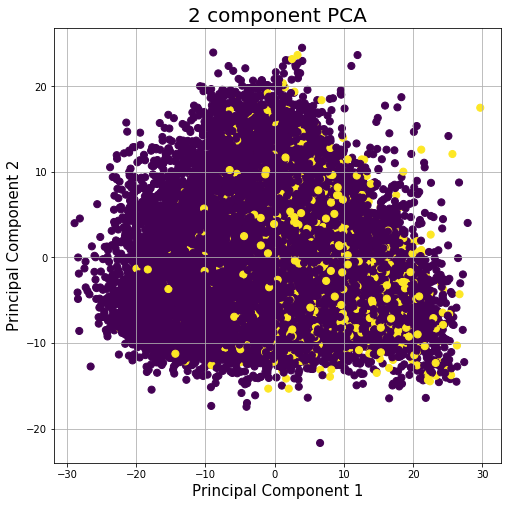

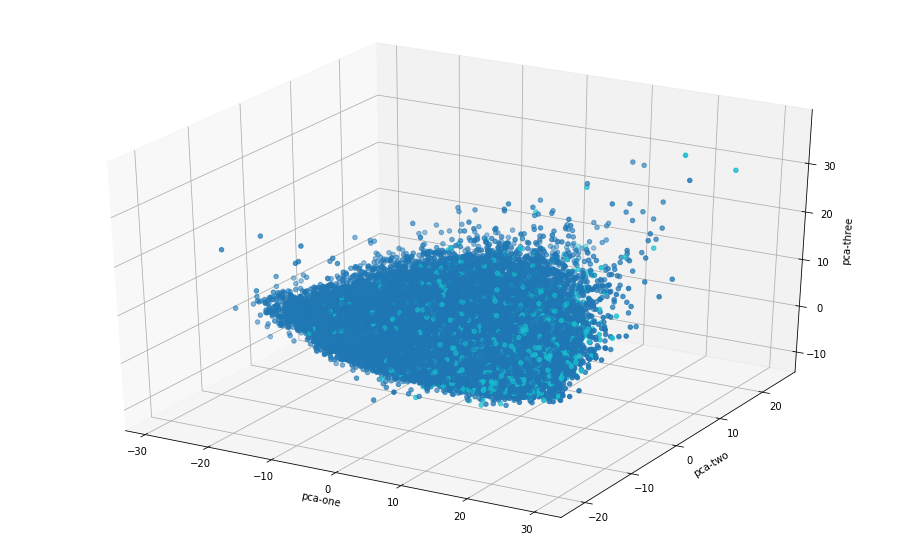

In [14]:
pca_computation(final_data, "loss")

# Data Modeling

### Note: This has changed to a classification problem

1. Random Forest/ Decision Tree

2. Support Vector Machine

3. K-NN Classifier

4. Linear Regression

5. Kernel Approximation

6. Stochastic Gradient Descent

### Previous Models

1. XG Boost Regressor

2. Random Forest Regressor

In [15]:
# # Only run this for presentation
# import matplotlib as mpl
# COLOR = 'white'
# mpl.rcParams['text.color'] = COLOR
# mpl.rcParams['axes.labelcolor'] = COLOR
# mpl.rcParams['xtick.color'] = COLOR
# mpl.rcParams['ytick.color'] = COLOR

In [122]:
def clip_modified(vector, threshold=None):
    """
    Binarizes a numpy array based on a threshold.
    """
    vec_copy = vector.copy()
    if threshold is None:
        vec_copy[vec_copy > 0] = 1
        vec_copy[vec_copy <= 0] = 0
    else:
        vec_copy[vec_copy >= threshold] = 1
        vec_copy[vec_copy < threshold] = 0
    return vec_copy

def get_best_features(X, num_features):
    """
    Reduce features to num_features
    """
    print("Starting PCA computation...")
    pca = PCA(n_components=num_features)
    pca_result = pca.fit_transform(X)
    print("Explained Variance:", pca.explained_variance_ratio_.sum())
    return pca_result

def down_sample(X, y):
    """
    Down sample data to have equal numbers of 
    positive and negative target variables.
    """
    print("Starting down sampling...")
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
    count = y.sum()
    indices0 = np.where(y == 0.0)[0]
    samples0 = random.choices(indices0, k=int(count))
    samples1 = list(np.where(y > 0)[0])
    samples0.extend(samples1)
    return X.iloc[samples0], y.iloc[samples0]

def prep_modeling(df, target):
    """
    Given dataframe and name of target column
    Creates a training, testing and validation set
    with ratios 4:3:3.
    Clips the target variable to binary.
    """
    print("Starting data splitting...")
    X = df.drop(columns=[target])
    y = df[target]
#     X = StandardScaler().fit_transform(X)
    Xtrain, Xtest = train_test_split(X, test_size=0.6, shuffle=True)
    Xtest, Xval = train_test_split(Xtest, test_size=0.5, shuffle=True)
    ytrain, ytest = train_test_split(y, test_size=0.6, shuffle=True)
    ytest, yval = train_test_split(ytest, test_size=0.5, shuffle=True)
    return Xtrain, Xtest, Xval, ytrain, ytest, yval

def check_predictions(ypred, yset, oob=False):
    """
    Check distribution and MAE score of the predicted
    values given by model on the test set.
    """
    print("MAE: ", mean_absolute_error(yset, ypred))
    
    binary_test = np.zeros(yset.shape[0])
    binary_test[yset > 0] = 1
    binary_pred = np.zeros(ypred.shape[0])
    binary_pred[ypred > 0] = 1
    print(classification_report(binary_test, binary_pred))

    plt.hist(ypred, bins=range(101))
    plt.yscale("log")
    plt.title('Histogram of Predicted loss (log scale)')
    plt.show()

    plt.hist(yset, bins=range(101))
    plt.yscale("log")
    plt.title('Histogram of Actual loss (log scale)')
    plt.show()

from sklearn.tree import DecisionTreeRegressor
def create_and_fit_model(model_type, X, y, classification=False):
    """
    Create models based on model_type and fit
    to the training data given. Returns the model.
    """
    y_use = y.copy()
    if classification:
        y_use[y_use > 0] = 1
    clf = None
    if model_type == 0:
        clf = RandomForestClassifier() # Rand Forest
    elif model_type == 1:
        clf = DecisionTreeClassifier()
    elif model_type == 2:
        clf = SVC(gamma='auto') # SVC
    elif model_type == 3:
        clf = KNeighborsClassifier(n_neighbors=2) # KNN
    elif model_type == 4:
        clf = LogisticRegression() # Lin Reg
    elif model_type == 6:
        clf = SGDClassifier()  # SGD
    elif model_type == 7:
        clf = GradientBoostingClassifier(max_features='sqrt', verbose=1)
    elif model_type == 8:
        clf = RandomForestRegressor()
    elif model_type == 9:
        clf = DecisionTreeRegressor()
    
    if clf is not None:
        clf.fit(X, y_use)
        
    return clf

def create_combined_model(clf_type, regr_type, X, y, Xe, ye):
    """
    Create models based on model_type and fit
    to the training data given. Returns the model.
    """
    y_use = y.copy()
    y_use[y_use > 0] = 1
    
    Xr = X[y >0]
    yr = y[y>0]
    
    Xer = Xe[ye >0]
    yer = ye[ye>0]
    
    ts = time.time() 
    
    clf = None
    model = None
    
    if clf_type == 0:
        clf = IsolationForest(contamination=0.1, behaviour="new").fit(X)
    elif clf_type == 1:
        clf = KNeighborsClassifier(n_neighbors=2)
        clf.fit(X, y_use)
    elif clf_type == 2:
        clf = DecisionTreeClassifier()
        clf.fit(X, y_use)
    
    if regr_type == 0:

        model = XGBRegressor(
            max_depth=10,
            n_estimators=1000,
            min_child_weight=0.5, 
            colsample_bytree=0.8, 
            subsample=0.8, 
            eta=0.01,
            seed=42)

        model.fit(
            Xr, 
            yr, 
            eval_metric="mae", 
            eval_set=[(Xr, yr), (Xer, yer)], 
            verbose=True, 
            early_stopping_rounds = 20)
        
    elif regr_type == 1:
        model = DecisionTreeClassifier(max_depth=20, criterion="entropy")
        model.fit(Xr, yr)
    elif regr_type == 2:
        model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1, 
                                       max_features=None, max_leaf_nodes=None, 
                                       min_impurity_decrease=0.0, min_impurity_split=None, 
                                       min_samples_leaf=1, min_samples_split=2, 
                                       min_weight_fraction_leaf=0.0, presort=False, 
                                       random_state=None, splitter='best')

        model.fit(Xr, yr)
    
    print("Training time:", time.time() - ts)
        
    return clf, model

def hyperparameter_tuning(model, X, y):
    
    parameters = {'criterion': ["mae"], 
                  'max_depth': range(1, 10), 
                  'min_samples_leaf' : range(1, 5)
                 }
    grid = GridSearchCV(model, parameters)
    grid.fit(X, y)
    return grid

def predict_on_model(models, X, num_models=1):
    """
    Create models based on model_type and fit
    to the training data given. Returns the model.
    """
    if num_models == 2:
        ypred1 = models[0].predict(X)
        ypred1[ypred1 > 0] = 0
        ypred1[ypred1 < 0] = 1
        interval = ypred1.copy()
        X_filtered = X[ypred1 > 0]
        ypred2 = models[1].predict(X_filtered).astype(int)
        ypred1[ypred1 > 0] = ypred2
        return ypred1, interval
    else:
        ypred = models.predict(X)
        return ypred
        


In [111]:
dropped_data["loss"] = data["loss"]
Xtrain, Xtest, Xval, ytrain, ytest, yval = prep_modeling(dropped_data, "loss")
bytrain = clip_modified(ytrain)
bytest = clip_modified(ytest)
Xtrain_down, ytrain_down = down_sample(Xtrain, ytrain)
Xtest_down, ytest_down = down_sample(Xtest, ytest)
Xval_down, yval_down = down_sample(Xval, yval)

Starting data splitting...
Starting down sampling...
Starting down sampling...
Starting down sampling...


In [112]:
# "Learn" the mean from the training data
mean_train = np.mean(ytrain)

# Get predictions on the test set
baseline_predictions = np.ones(ytrain.shape) * mean_train
zero_predictions = np.zeros(ytrain.shape)

# Compute MAE
print("Training Set:")
mae_baseline = mean_absolute_error(ytrain, baseline_predictions)
print("Mean MAE is {:.2f}".format(mae_baseline))
mae_baseline = mean_absolute_error(ytrain, zero_predictions)
print("Zero MAE is {:.2f}".format(mae_baseline))

# Get predictions on the test set
baseline_predictions = np.ones(ytest.shape) * mean_train
zero_predictions = np.zeros(ytest.shape)

# Compute MAE
print("Testing Set:")
mae_baseline = mean_absolute_error(ytest, baseline_predictions)
print("Mean MAE is {:.2f}".format(mae_baseline))
mae_baseline = mean_absolute_error(ytest, zero_predictions)
print("Zero MAE is {:.2f}".format(mae_baseline))

# Get predictions on the test set
baseline_predictions = np.ones(yval.shape) * mean_train
zero_predictions = np.zeros(yval.shape)

# Compute MAE
print("Validation Set:")
mae_baseline = mean_absolute_error(yval, baseline_predictions)
print("Mean MAE is {:.2f}".format(mae_baseline))
mae_baseline = mean_absolute_error(yval, zero_predictions)
print("Zero MAE is {:.2f}".format(mae_baseline))

Training Set:
Mean MAE is 1.41
Zero MAE is 0.78
Testing Set:
Mean MAE is 1.44
Zero MAE is 0.81
Validation Set:
Mean MAE is 1.45
Zero MAE is 0.82



Random Forest Classifier


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE:  0.8060427925792485
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28667
         1.0       0.09      0.00      0.00      2974

    accuracy                           0.90     31641
   macro avg       0.50      0.50      0.48     31641
weighted avg       0.83      0.90      0.86     31641



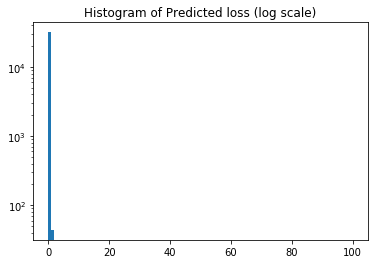

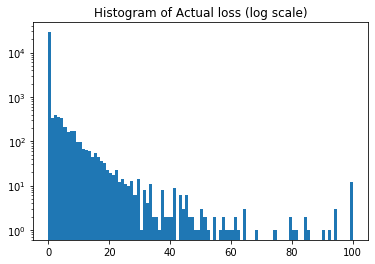

In [95]:
print("\nRandom Forest Classifier")
model2 = create_and_fit_model(0, Xtrain, ytrain, classification=True)
ypred2 = predict_on_model(model2, Xtest)
check_predictions(ypred2, ytest)


Decision Tree Classifier
MAE:  0.9001611832748649
              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89     28667
         1.0       0.10      0.12      0.11      2974

    accuracy                           0.81     31641
   macro avg       0.50      0.50      0.50     31641
weighted avg       0.83      0.81      0.82     31641



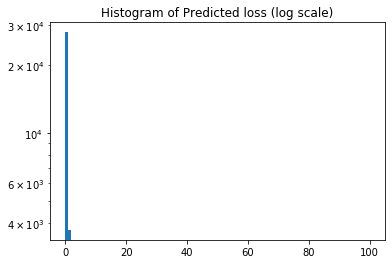

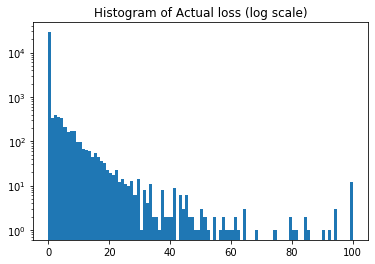

In [45]:
print("\nDecision Tree Classifier")
model1 = create_and_fit_model(1, Xtrain, ytrain, classification=True)
ypred1 = predict_on_model(model1, Xtest)
check_predictions(ypred1, ytest)



Support Vector Classifier
MAE:  0.8076862298915963
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     28700
         1.0       0.00      0.00      0.00      2941

    accuracy                           0.91     31641
   macro avg       0.45      0.50      0.48     31641
weighted avg       0.82      0.91      0.86     31641



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


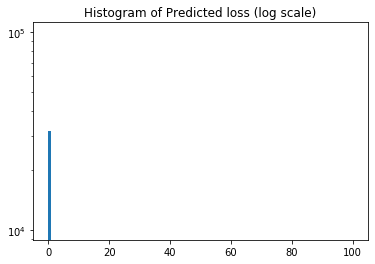

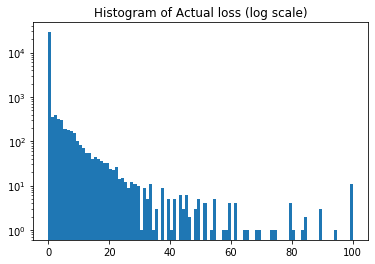

In [117]:
print("\nSupport Vector Classifier")
model3 = create_and_fit_model(2, Xtrain, ytrain, classification=True)
ypred3 = predict_on_model(model3, Xtest)
check_predictions(ypred3, ytest)



KNN Classifier
MAE:  0.8141651654498909
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     28700
         1.0       0.08      0.01      0.01      2941

    accuracy                           0.90     31641
   macro avg       0.49      0.50      0.48     31641
weighted avg       0.83      0.90      0.86     31641



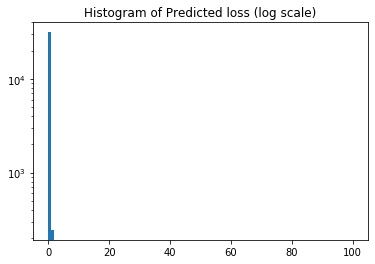

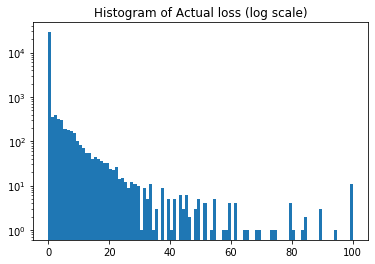

In [116]:
print("\nKNN Classifier")
model4 = create_and_fit_model(3, Xtrain, ytrain, classification=True)
ypred4 = predict_on_model(model4, Xtest)
check_predictions(ypred4, ytest)



Logistic Regressor


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MAE:  0.8094560854587403
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     28715
           1       0.23      0.00      0.00      2926

    accuracy                           0.91     31641
   macro avg       0.57      0.50      0.48     31641
weighted avg       0.84      0.91      0.86     31641



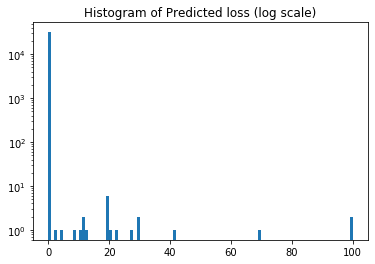

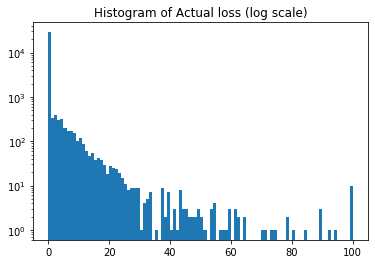

In [34]:
print("\nLogistic Regressor")
model5 = create_and_fit_model(4, Xtrain, ytrain)
ypred5 = predict_on_model(model5, Xtest)
check_predictions(ypred5, ytest)



Stochastic Gradient Descent
MAE:  0.8115103820991751
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     28715
           1       0.08      0.01      0.01      2926

    accuracy                           0.90     31641
   macro avg       0.49      0.50      0.48     31641
weighted avg       0.83      0.90      0.86     31641



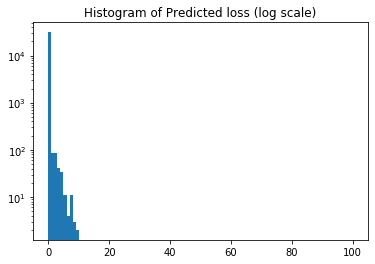

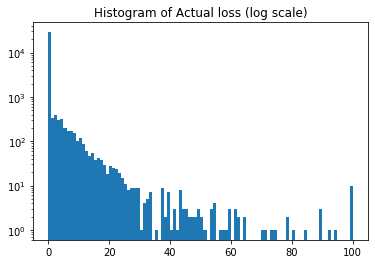

In [32]:
print("\nStochastic Gradient Descent")
model6 = create_and_fit_model(6, Xtrain, ytrain, classification=True)
ypred6 = predict_on_model(model6, Xtest)
check_predictions(ypred6, ytest)



Gradient Boosting Classifier
      Iter       Train Loss   Remaining Time 
         1           0.6096            2.94s
         2           0.6094            2.90s
         3           0.6091            2.93s
         4           0.6088            2.79s
         5           0.6085            2.73s
         6           0.6081            2.67s
         7           0.6078            2.76s
         8           0.6075            2.67s
         9           0.6074            2.61s
        10           0.6072            2.58s
        20           0.6047            2.22s
        30           0.6023            2.00s
        40           0.6008            1.69s
        50           0.5986            1.43s
        60           0.5963            1.14s
        70           0.5948            0.85s
        80           0.5934            0.56s
        90           0.5911            0.28s
       100           0.5890            0.00s
MAE:  0.8077810435826933
              precision    recall  f1-score 

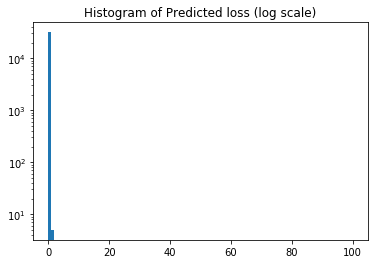

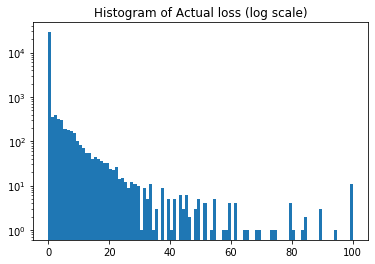

In [123]:
print("\nGradient Boosting Classifier")
model7 = create_and_fit_model(7, Xtrain, ytrain, classification=True)
ypred7 = predict_on_model(model7, Xtest)
check_predictions(ypred7, ytest)


Random Forest Regressor


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAE:  1.7596630953509687
              precision    recall  f1-score   support

           0       0.91      0.35      0.51     28715
           1       0.09      0.66      0.16      2926

    accuracy                           0.38     31641
   macro avg       0.50      0.50      0.33     31641
weighted avg       0.83      0.38      0.47     31641



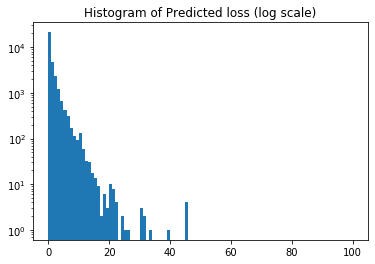

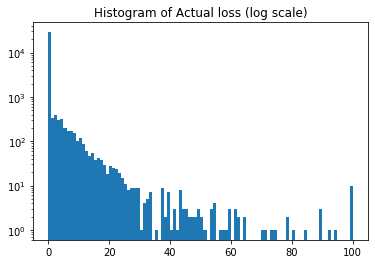

In [29]:
print("\nRandom Forest Regressor")
model8 = create_and_fit_model(8, Xtrain, ytrain)
ypred8 = predict_on_model(model8, Xtest)
check_predictions(ypred8, ytest)



Random Forest Regressor
MAE:  1.5007427072469264
              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77     28667
         1.0       0.09      0.31      0.14      2974

    accuracy                           0.64     31641
   macro avg       0.50      0.49      0.45     31641
weighted avg       0.83      0.64      0.71     31641



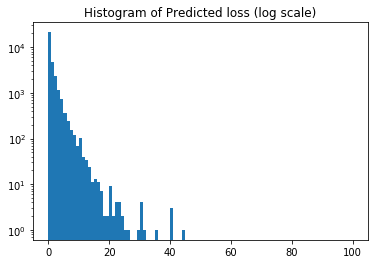

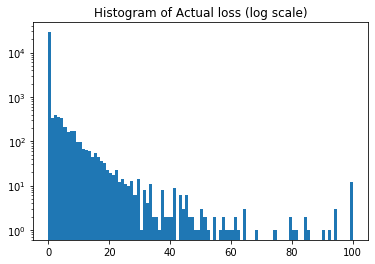

In [72]:
print("\nRandom Forest Regressor")
model8 = create_and_fit_model(8, Xtrain, ytrain)
ypred8 = predict_on_model(model8, Xtest)
check_predictions(ypred8.astype(int), ytest)



Decision Tree Regressor
MAE:  1.8406813943933504
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     28667
         1.0       0.09      0.12      0.10      2974

    accuracy                           0.80     31641
   macro avg       0.50      0.50      0.49     31641
weighted avg       0.83      0.80      0.82     31641



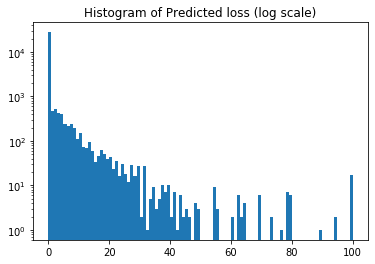

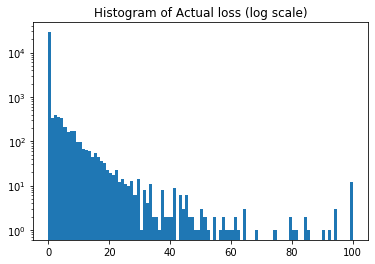

In [73]:
print("\nDecision Tree Regressor")
model9 = create_and_fit_model(9, Xtrain, ytrain)
ypred9 = predict_on_model(model9, Xtest)
check_predictions(ypred9, ytest)

[0]	validation_0-mae:8.14257	validation_1-mae:7.98839
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 20 rounds.
[1]	validation_0-mae:8.06508	validation_1-mae:7.91200
[2]	validation_0-mae:7.98762	validation_1-mae:7.83362
[3]	validation_0-mae:7.91083	validation_1-mae:7.75760
[4]	validation_0-mae:7.83310	validation_1-mae:7.68039
[5]	validation_0-mae:7.75882	validation_1-mae:7.60767
[6]	validation_0-mae:7.68756	validation_1-mae:7.53673
[7]	validation_0-mae:7.62608	validation_1-mae:7.47753
[8]	validation_0-mae:7.56866	validation_1-mae:7.42229
[9]	validation_0-mae:7.51313	validation_1-mae:7.36585
[10]	validation_0-mae:7.45546	validation_1-mae:7.31045
[11]	validation_0-mae:7.40023	validation_1-mae:7.25565
[12]	validation_0-mae:7.34556	validation_1-mae:7.20167
[13]	validation_0-mae:7.29057	validation_1-mae:7.14953
[14]	validation_0-mae:7.23704	validation_1-mae:7.09855
[15]	validation_0-mae:7.1838

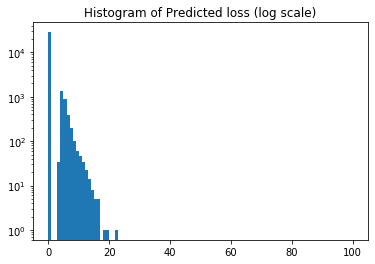

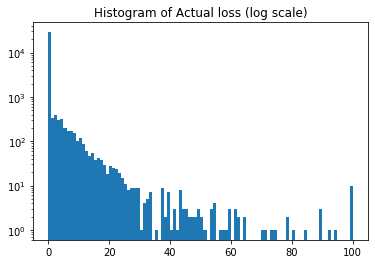

In [19]:
models1 = create_combined_model(0, 0, Xtrain, ytrain, Xtest, ytest)
ypred01, mid01 = predict_on_model(models1, Xtest, num_models=2)
check_predictions(ypred01, ytest)

Training time: 26.066861152648926
MAE:  1.627287380297715
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     28715
           1       0.09      0.10      0.10      2926

    accuracy                           0.82     31641
   macro avg       0.50      0.50      0.50     31641
weighted avg       0.83      0.82      0.83     31641



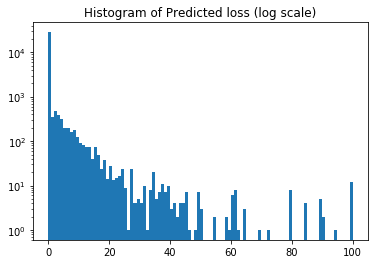

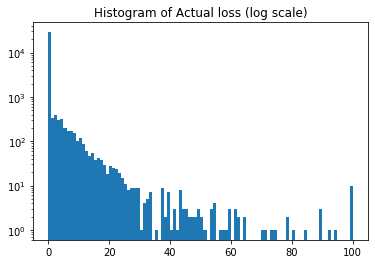

In [20]:
models2 = create_combined_model(0, 1, Xtrain, ytrain, Xtest, ytest)
ypred02, mid02 = predict_on_model(models2, Xtest, num_models=2)
check_predictions(ypred02, ytest)

Training time: 22.708805322647095
MAE:  0.9590404854460984
              precision    recall  f1-score   support

           0       0.91      0.90      0.90     28715
           1       0.09      0.10      0.10      2926

    accuracy                           0.83     31641
   macro avg       0.50      0.50      0.50     31641
weighted avg       0.83      0.83      0.83     31641



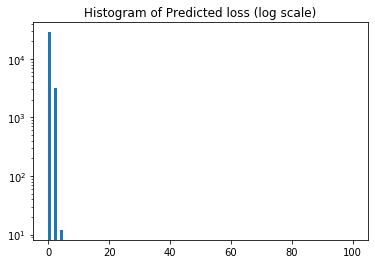

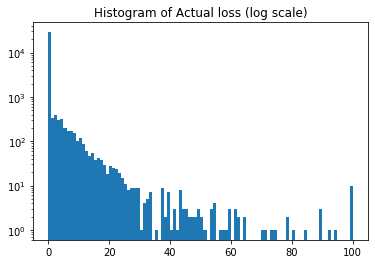

In [21]:
models3 = create_combined_model(0, 2, Xtrain, ytrain, Xtest, ytest)
ypred03, mid03 = predict_on_model(models3, Xtest, num_models=2)
check_predictions(ypred03, ytest)